In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/English/digit/train.csv")

In [3]:
Y_train = df["label"]

# Drop 'label' column
X_train = df.drop(labels = ["label"],axis = 1) 

# free some space
del df

Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

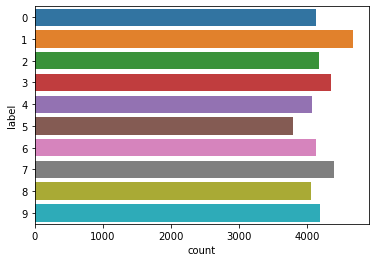

In [4]:
import seaborn as sns
graph = sns.countplot(y=Y_train)

In [5]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
X_train /=  255.0

In [7]:
X_train = X_train.values.reshape(-1,28,28,1).astype('float32')

In [8]:
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding

# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state=42)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


# my CNN architecture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Dense -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [12]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data augmentation

datagen = ImageDataGenerator(
  
        featurewise_center=False,                      # set input mean to 0 over the dataset
        samplewise_center=False,                       # set each sample mean to 0
        featurewise_std_normalization=False,           # divide inputs by std of the dataset
        samplewise_std_normalization=False,            # divide each input by its std
        zca_whitening=False,                           # apply ZCA whitening
        rotation_range=10,                             # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1,                              # Randomly zoom image 
        width_shift_range=0.1,                         # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,                        # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,                         # randomly flip images
        vertical_flip=False)                           # randomly flip images


datagen.fit(X_train)

In [15]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size= 86), epochs = 30, validation_data = (X_val,Y_val),
            verbose = 1, steps_per_epoch=X_train.shape[0] // 86, callbacks=[learning_rate_reduction])

Epoch 1/30
415/415 [==============================] - 57s 137ms/step - loss: 0.4325 - acc: 0.8609 - val_loss: 0.0769 - val_acc: 0.9763
Epoch 2/30
415/415 [==============================] - 58s 140ms/step - loss: 0.1341 - acc: 0.9598 - val_loss: 0.0429 - val_acc: 0.9856
Epoch 3/30
415/415 [==============================] - 58s 140ms/step - loss: 0.0944 - acc: 0.9722 - val_loss: 0.0345 - val_acc: 0.9905
Epoch 4/30
415/415 [==============================] - 58s 140ms/step - loss: 0.0786 - acc: 0.9772 - val_loss: 0.0347 - val_acc: 0.9900
Epoch 5/30
415/415 [==============================] - 58s 140ms/step - loss: 0.0700 - acc: 0.9796 - val_loss: 0.0324 - val_acc: 0.9903
Epoch 6/30
6300/415 [================================================================================================================================================================================================================================================================================================================

Epoch 12/30
415/415 [==============================] - 58s 141ms/step - loss: 0.0371 - acc: 0.9892 - val_loss: 0.0241 - val_acc: 0.9927
Epoch 13/30
415/415 [==============================] - 58s 141ms/step - loss: 0.0344 - acc: 0.9902 - val_loss: 0.0206 - val_acc: 0.9946
Epoch 14/30
415/415 [==============================] - 58s 141ms/step - loss: 0.0360 - acc: 0.9894 - val_loss: 0.0209 - val_acc: 0.9943
Epoch 15/30
415/415 [==============================] - 58s 141ms/step - loss: 0.0333 - acc: 0.9903 - val_loss: 0.0240 - val_acc: 0.9932
Epoch 16/30
6300/415 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================

Epoch 23/30
415/415 [==============================] - 58s 141ms/step - loss: 0.0263 - acc: 0.9920 - val_loss: 0.0195 - val_acc: 0.9948
Epoch 24/30
415/415 [==============================] - 59s 141ms/step - loss: 0.0253 - acc: 0.9925 - val_loss: 0.0188 - val_acc: 0.9949
Epoch 25/30
415/415 [==============================] - 59s 141ms/step - loss: 0.0257 - acc: 0.9924 - val_loss: 0.0208 - val_acc: 0.9943
Epoch 26/30
415/415 [==============================] - 59s 141ms/step - loss: 0.0258 - acc: 0.9927 - val_loss: 0.0192 - val_acc: 0.9941
Epoch 27/30
6300/415 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [16]:
scores = model.evaluate(X_val, Y_val, verbose=0)                                                     

print('Test loss: %.2f%%' % scores[0])
print('Test accuracy: %.4f%%' % scores[1])
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Test loss: 0.02%
Test accuracy: 0.9941%
Large CNN Error: 0.59%


In [17]:
model.save('output/E_D_9941.h5')